In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:80% !important;}</style>'))


In [11]:
from IPython import display
import pandas as pd
import os
import time 
import subprocess
from astropy import wcs
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
import numpy as np
import random
import matplotlib.pyplot as plt
from astropy.visualization import (ZScaleInterval, ImageNormalize)

DWNLD_PATH = "dwnlds/c_"
RESULTS_PATH = "results_3/results_b3_initial/"# '/home/toyonaga/scratch/pipeline/results_recover_2/'#
start = int(input('start from this results file '))
end = int(input("end at this results file "))
CSV_PATH="test_csv" #shouldn't have to change

OUT_PATH_1 = "detections_bj3_dec17/c_"

im_info = pd.read_csv(CSV_PATH)
# count=0
# for job in range(end-start):
   
#     '''populate coordinate dict with result file info'''

#     try:
#         crd_dict = get_positives(RESULTS_PATH+"results_"+str(job+start)+".out")
#         print(len(crd_dict['ra']))
#         count+=len(crd_dict['prb'])
#     except:
#         print('missing results from job: '+str(job))
#         continue

start from this results file 4395
end at this results file 5000


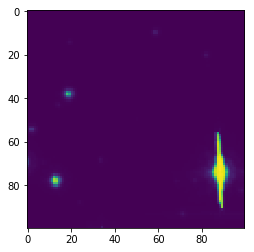

0.9998777508735656|| logscale =18, log black=19, exit=20, job: 4487 jb6v16010_drz.fits20


In [12]:
def dwnld(entry): 
    subprocess.check_output(["wget", "-O",DWNLD_PATH+str(entry)+ ".fits" ,
                             "http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/MAST/HST/product/"+
                             im_info['obj_name'][entry]+"_drz.fits"]) 

def get_positives(filename):
    #get coords of pred above 0.9
    crd_dict = {"ra": [], "dec":[], "obj_name":[], "prb_1":[] , "prb_2":[] , "prb_3":[] } 
    df = pd.read_csv(filename, sep = ',')
    for row in range(len(df)):
        if (float(df['prb_1'][row]) >= 0.9) :#and (float(df['prb'][row])<0.95) :
            crd_dict['prb_1'].append(df['prb_1'][row])
            crd_dict['ra'].append(df['ra'][row])
            crd_dict['dec'].append(df['dec'][row])
            crd_dict['obj_name'].append(df['obj_name'][row])
    print(len(crd_dict['ra']))
    return crd_dict
        
    
        
for job in range(end-start):
   
    '''populate coordinate dict with result file info'''
    try:
        crd_dict = get_positives(RESULTS_PATH+"results_"+str(job+start)+".out")
        print(len(crd_dict['ra']))
    except:
        print('missing results from job: '+str(job+start))
        continue
        
    if len(crd_dict['ra'])<1: #dont download anything if no candidates
        continue
        
    '''download image cutouts based on the file names''' 
    fails=0
    print("dwnlding image " + str(job+start))
    try: 
        dwnld(job+start)
    except:
        fails+=1
        print("Failed")
        
        print("failed: "+str(fails))
        continue    
        
    '''make 100x100 boxes'''
    data, hdr = fits.getdata(DWNLD_PATH + str(job+start) + ".fits", 1, header=True) #'sci' image[1] data and header
    w = wcs.WCS(hdr)
    exit=False
    skip=False
    for cutout in range(len(crd_dict["obj_name"])):
        try:                                

            pixcrd2 = w.wcs_world2pix([[float(crd_dict['ra'][cutout]), float(crd_dict['dec'][cutout])]], 0)
            centered_cut = Cutout2D(data, (pixcrd2[0][0], pixcrd2[0][1]), (100, 100))
            
            ims=centered_cut.data
#             print(crd_dict['prb'][cutout])

            
            display.clear_output(wait=True)
            plt.imshow(ims) 
            plt.pause(0.10)
            while(1):
                ans = int(input(str(crd_dict['prb_1'][cutout])+"|| logscale =18, log black=19, exit=20, job: "+str(job+start)+" "+crd_dict['obj_name'][cutout]))

                if ans ==1:
                    fits.writeto(OUT_PATH_1+ str(crd_dict['ra'][cutout]) + "_" + str(crd_dict['dec'][cutout]) +'.fits',centered_cut.data, header=hdr, overwrite =True)
                    
                    break
                if ans ==2:
                    skip=True
                    break

                if ans ==18:
                    plt.imshow(np.log10(ims+1)) 
                    plt.pause(0.1)
                if ans ==19:
                    plt.imshow(np.log10(ims+1),cmap='gray') 
                    plt.pause(0.1)
                if ans==21:
                    norm = ImageNormalize(ims, interval = ZScaleInterval())
                    plt.imshow(ims,norm=norm, cmap='gray')
                    plt.pause(0.1)
                if ans ==20:
                    exit=True
                    break
            if exit==True or skip==True:
                break
        except:
            print("skipped due to non-existent image, or conversion error")
        
    if exit==True:
        break
        
        
        
        
        

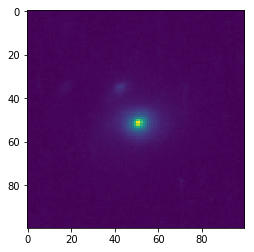

c_177.39176464956057_22.390531096903768.fits|| logscale =18, log black=19, exit=20,21


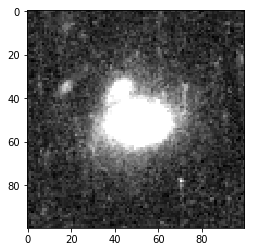

c_177.39176464956057_22.390531096903768.fits|| logscale =18, log black=19, exit=20,20


In [13]:

# closer inspection
from IPython import display
from astropy.visualization import (ZScaleInterval, ImageNormalize)

import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
PATH = "detections_bj3_dec17/"#HSTLens_detections/"
for filename in os.listdir(PATH):
    try:  
        data, hdr = fits.getdata(PATH + filename, 0, header=True) #'sci' image[1] data and header
        exit=False
       

        ims=data

        display.clear_output(wait=True)
        
        plt.imshow((ims)) 
        plt.pause(0.10)
        while(1):
            ans = int(input(filename+"|| logscale =18, log black=19, exit=20,"))

            if ans ==18:
                plt.imshow(np.log10(ims+1)) 
                plt.pause(0.1)
            if ans ==19:
                plt.imshow(np.log10(ims+1),cmap='gray') 
                plt.pause(0.1)
            if ans ==20:
                exit=True
                break
            if ans ==21:
                norm = ImageNormalize(ims, interval = ZScaleInterval())
                plt.imshow(ims,norm=norm,cmap='gray') 
                plt.pause(0.1)
        if exit==True:
            break
    except:
        print("skipped due to non-existent image, or conversion error")
        
        

    if exit==True:
        break



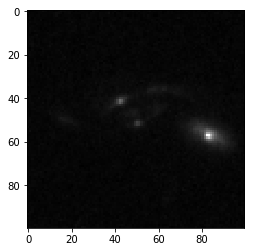

In [29]:
PATH = "/home/toyonaga/projects/def-sfabbro/toyonaga/HSTLens/CC_batch_processing/class_1/"#/good_quality/"#HSTLens_detections/"

data, hdr = fits.getdata(PATH + 'c_189.1720726077293_62.195145751291975.fits', 0, header=True) #'sci' image[1] data and header
norm = ImageNormalize(data, interval = ZScaleInterval())
plt.imshow(data,cmap='gray')